# Dataset- "Predictive Modeling of Income Levels based on Demographic and Employment Features"

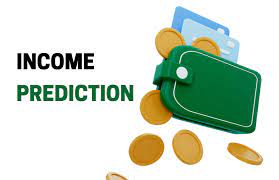

# Task
- Importing Libraries
- Preprocessing Part
    - Missing Value Treatment
    - Outlier Checking
- Exploratory Data Analysis
- Label Encoding
- Feature Scaling
- Algorithm
    - Logistic Regression
    - Random Forest Classifier
    - K Nearset Nrigbour(KNN)

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [4]:
dm = pd.read_csv("Data_inc_project.csv")

In [5]:
dm.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# About Column
- Age: The age of an employee
- Work-class: Profession category 
- Final_census : Census(population of the country)
- Education: Type of last (max) Education
- Education_num: Years spend on studies
- Marital Status: Person married or not
- Occupation: Person 
- Relationship: Bounded by any relation or dependent 
- Race: which ethnicity belongs to the employee 
- Gender: gender of the employee
- Capital-gain: Capital gain refers to the profit earned when selling a capital asset, such as stocks, real estate, or valuable possessions. It represents the difference between the selling price of the asset and its original purchase price.
- Capital-loss: Capital loss refers to the financial loss incurred when selling a capital asset at a price lower than its original purchase price. It represents the negative difference between the selling price and the purchase price of the asset.
- Hours/week : How many working hours in a week
- Country : Country where it belongs
- Income threshold(Target Column) : two range of Income one is <=50k and >50K

In [6]:
dm.shape

(32561, 15)

In [7]:
# 32561 Row and 15 Column in the dataset

In [8]:
dm.duplicated().sum()

24

In [9]:
# all duplicate row
a = dm[dm.duplicated()]
a

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [10]:
# drop duplicate rows
dm = dm.drop_duplicates()

In [11]:
dm.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Checking Missing Values

In [12]:
dm.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
 Education          0
 Education-num      0
 marital-status     0
 occupation         0
 relationship       0
 race               0
Gender              0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 country            0
 income             0
dtype: int64

In [13]:
# Checking Unique Values
for i in dm:
    print(i)
    print("****"*10)
    print(dm[i].unique())

Age
****************************************
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Profession Class
****************************************
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Final_census
****************************************
[ 77516  83311 215646 ...  34066  84661 257302]
 Education
****************************************
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 Education-num
****************************************
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
 marital-status
****************************************
[' Never-married' ' Married-civ-spouse' ' 

There are no missing values in the dataset but in it there are some variable("occupation", "Profession Class", "country") have values " ? "  here we have to 1st change it in np.null values

In [14]:
dm.select_dtypes(exclude= "O").columns

Index(['Age', 'Final_census', ' Education-num', ' capital-gain',
       ' capital-loss', ' hours-per-week'],
      dtype='object')

In [15]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32537 non-null  int64 
 1   Profession Class  32537 non-null  object
 2   Final_census      32537 non-null  int64 
 3    Education        32537 non-null  object
 4    Education-num    32537 non-null  int64 
 5    marital-status   32537 non-null  object
 6    occupation       32537 non-null  object
 7    relationship     32537 non-null  object
 8    race             32537 non-null  object
 9   Gender            32537 non-null  object
 10   capital-gain     32537 non-null  int64 
 11   capital-loss     32537 non-null  int64 
 12   hours-per-week   32537 non-null  int64 
 13   country          32537 non-null  object
 14   income           32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


total 9 object type column, and 6 int type columns

In [16]:
dm.describe().round(2)

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00
mean,38.59,189780.85,10.08,1078.44,87.37,40.44
std,13.64,105556.47,2.57,7387.96,403.10,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,236993.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


# Observation:
- Age - The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
- Education-num - The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- capital-gain - While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
-  	hours-per-week - The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [17]:
dm.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income'],
      dtype='object')

In [18]:
# removing space in front to variable name
dm.columns = dm.columns.str.strip()

# Select columns
col_sel = dm[["occupation", "Profession Class", "country"]]

In [19]:
# checking value count of "col_sel" columns
for i in col_sel:
    print(col_sel[i].value_counts())

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64
 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador             

In [20]:
col_sel.head()

,occupation,Profession Class,country
0,Adm-clerical,State-gov,United-States
1,Exec-managerial,Self-emp-not-inc,United-States
2,Handlers-cleaners,Private,United-States
3,Handlers-cleaners,Private,United-States
4,Prof-specialty,Private,Cuba


In [21]:
# "?" change to nan values
dm[col_sel.columns] = dm[col_sel.columns].replace(" ?", np.nan)

In [22]:
dm.isnull().sum()

Age                    0
Profession Class    1836
Final_census           0
Education              0
Education-num          0
marital-status         0
occupation          1843
relationship           0
race                   0
Gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
country              582
income                 0
dtype: int64

In [23]:
# using mode to filling missing values by mode method

dm[col_sel.columns] = dm[col_sel.columns].fillna(dm[col_sel.columns].mode().iloc[0])

In [24]:
dm.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
Education           0
Education-num       0
marital-status      0
occupation          0
relationship        0
race                0
Gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
country             0
income              0
dtype: int64

In [25]:
for i in dm:
    print(i)
    print(dm[i].value_counts())

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
Profession Class
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64
Final_census
164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: Final_census, Length: 21648, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          5

## missing values filled now

# checking Outliers

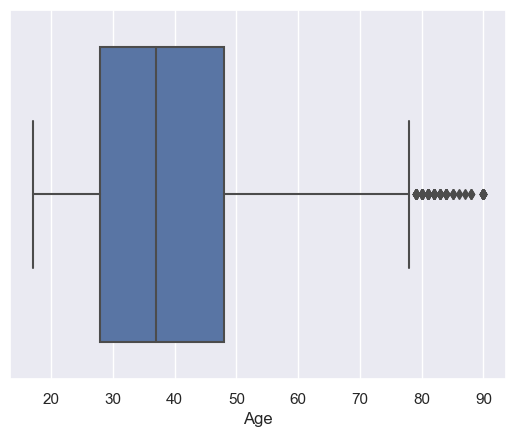

None


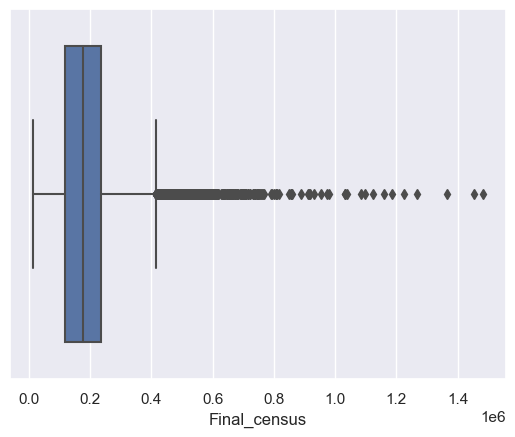

None


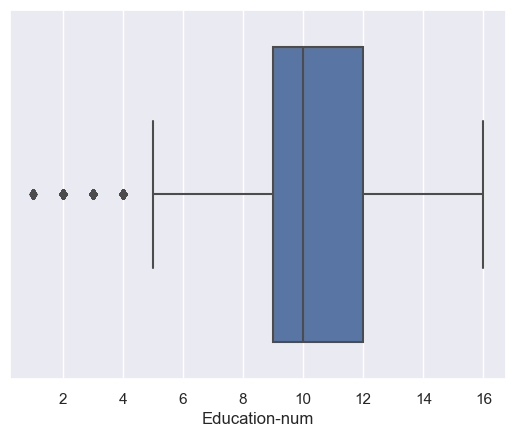

None


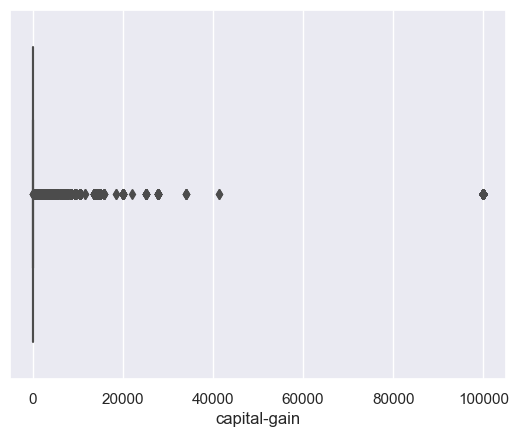

None


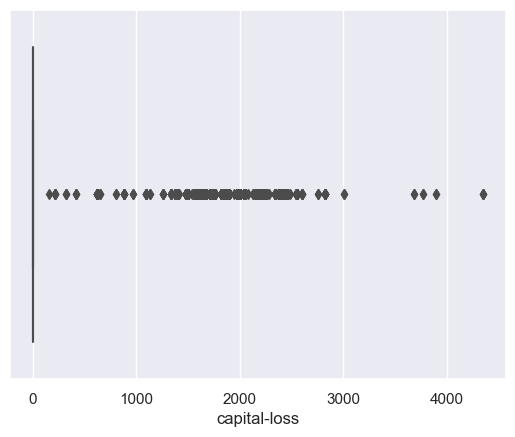

None


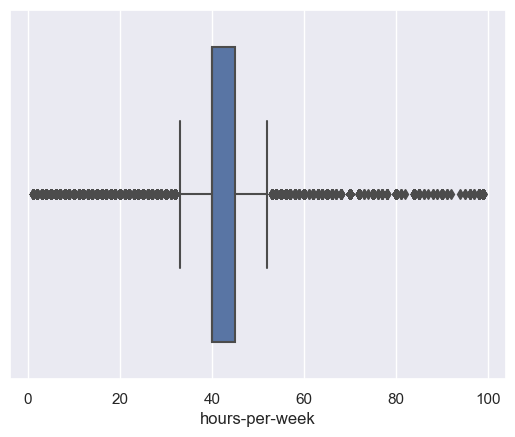

None


In [26]:
def outs(name):
    sns.boxplot(dm[name])
    plt.show()
    
for i in dm.select_dtypes(exclude= "object"):
    print(outs(i))

# observation:-
- according to boxplot column "hours per week" lower value -> arround 33 and upper value is arround 53 so, 
* 33 hour in week means 5 hr pr day average, 
* 53 hr means 8 hr per day averagily

In [27]:
dm.columns

Index(['Age', 'Profession Class', 'Final_census', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [28]:
# capping method
def cap(dd, col):
    q1 = dd[col].quantile(0.25)
    q3= dd[col].quantile(0.75)
    iqr = q3-q1
    lw = q1-1.5*iqr
    up = q3+1.5*iqr
    dd[col].clip(lw, up, inplace=True)

In [29]:
dg_col = dm[["Age", 'Education-num', 'hours-per-week']]


In [30]:
for i in dg_col.columns:
    cap(dm, i)
dm.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39.0,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


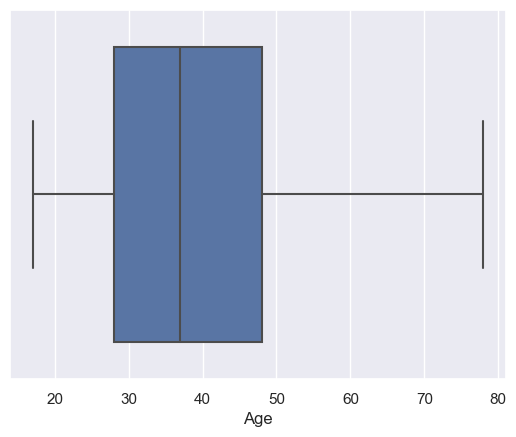

None


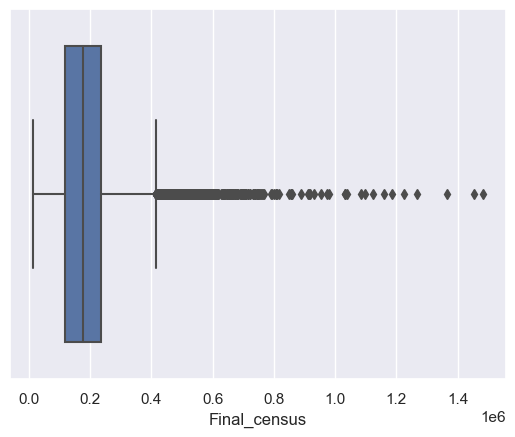

None


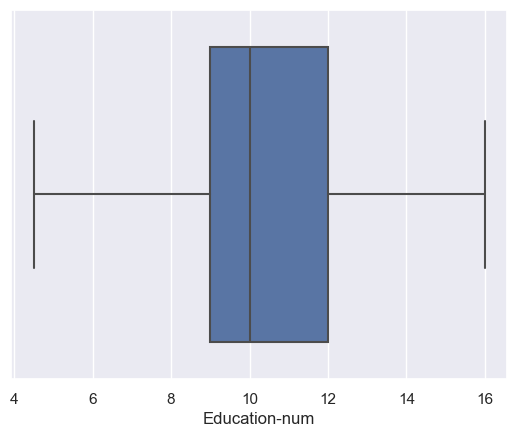

None


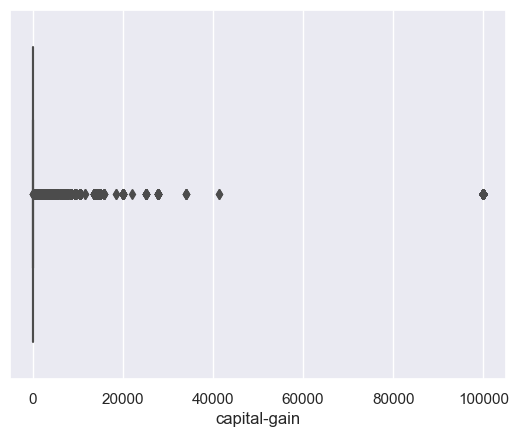

None


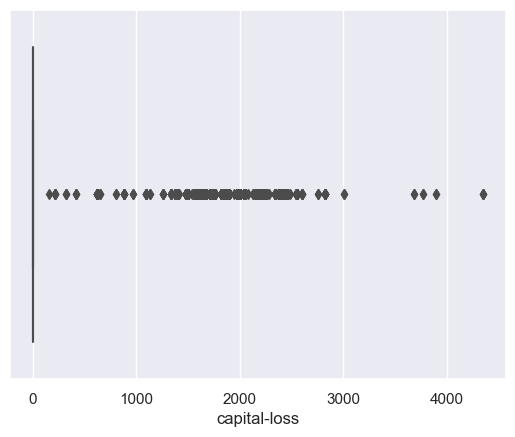

None


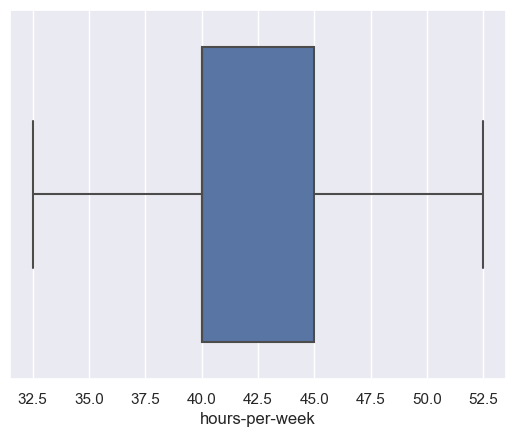

None


In [31]:
def outs(name):
    sns.boxplot(dm[name])
    plt.show()
    
for i in dm.select_dtypes(exclude= "object"):
    print(outs(i))

# EDA

### Income and Education_num

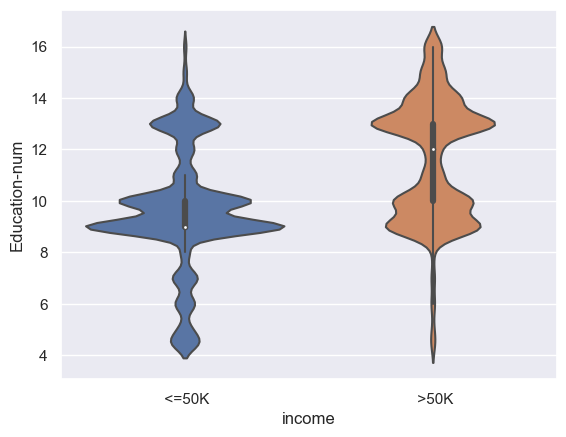

In [32]:
sns.violinplot(x = "income", y = "Education-num", data= dm)
plt.show()

# Observation
- below 50k income's education arround 12th to Assoc-voc
- more than 50k value education arround Assoc-acdm , Bachelors and Masters

In [33]:
dm["income"].value_counts()

 <=50K    24698
 >50K      7839
Name: income, dtype: int64

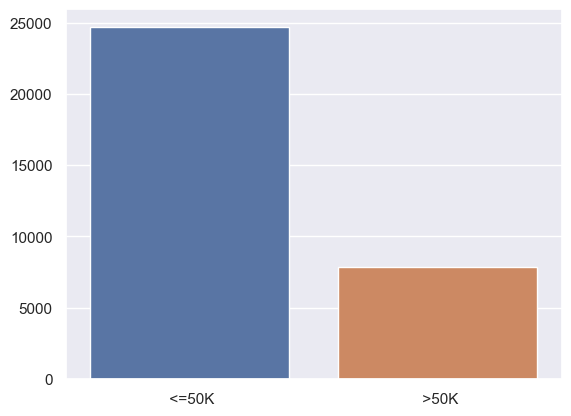

In [34]:
sns.barplot(x = dm["income"].value_counts().index, y = dm["income"].value_counts().values)
plt.show()

# Observation:
- The number of people earning more than 50K dollars an year is one third of the people earning less than it.


# Gender

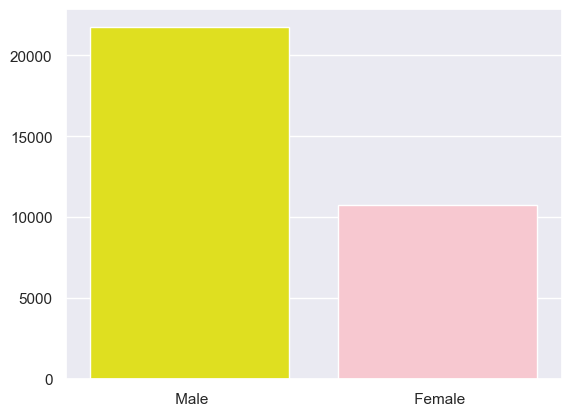

In [35]:
sns.barplot(x = dm["Gender"].value_counts().index, y = dm["Gender"].value_counts().values, palette=["yellow", "pink"])
plt.show()

# Observation
in dataset we have only half of female present in respect to male in dataset, the cause can be data is not fully avilable or only half female is actually present at servisces in respect of male

# Age Column

In [36]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

dm['age_group'] = dm['Age'].apply(age_group)

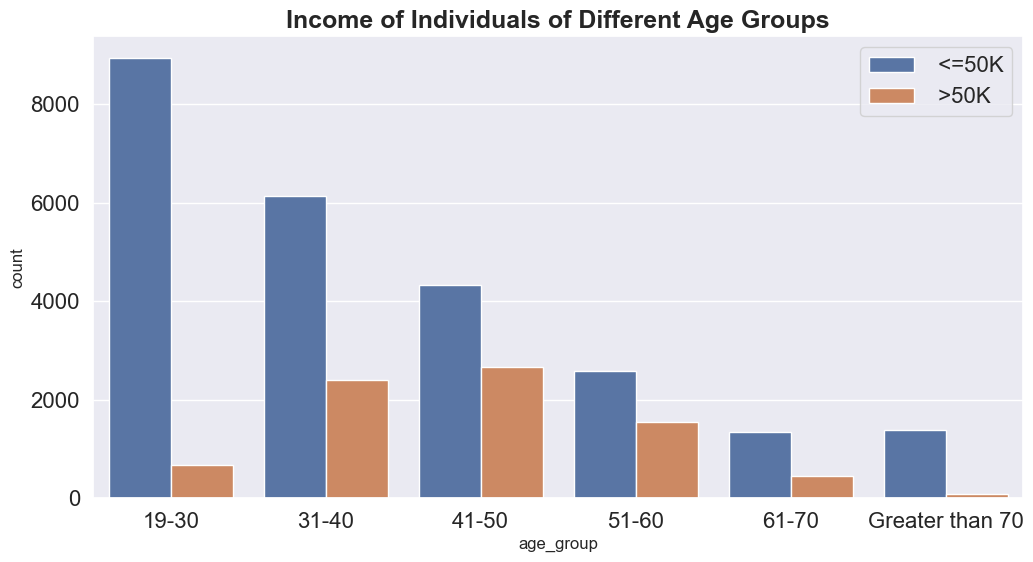

In [37]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(dm['age_group'], hue = dm['income'], order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation:
 - We make an interesting observation over here. We see that people earning more than 50K dollars increase as the age increases upto a certain extent.

As one might imagine, the number of people earning more than 50K is quite negligible amongst people of age group 19-30.
For the people of age group 41-50 and 51-60, the number of people earning more than 50K is quite comparable to those earning less than it!

# Education

<AxesSubplot:>

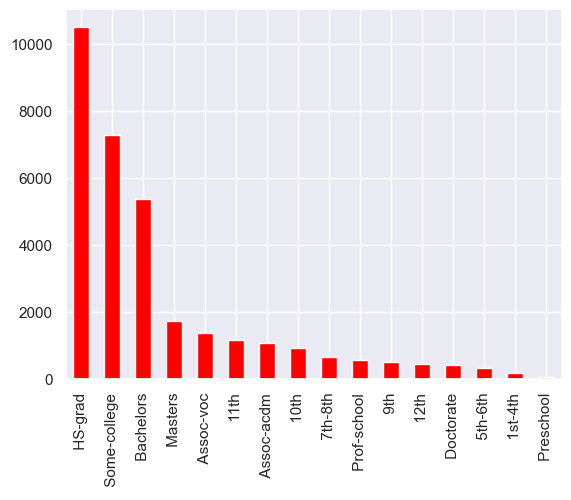

In [38]:
dm["Education"].value_counts().plot(kind="bar", color = ["red"])

- pre school - 1, 1st 4th - 2, 5th 6th - 3, 7th 8th - 4, 9th - 5, 10th - 6, 11th - 7th, 12th - 8, HS-grad - 9,
- Some-college- 10, Assoc-voc - 11, Assoc-acdm - 12, Bachelors- 13, Masters - 14, Prof-school - 15, Doctorate - 16



### About some understandable terms in the Education Column


- Professional schools are institutions that offer specialized education and training in fields such as law, medicine, business, or other professions
- HS-grad (High School Graduate): This category represents individuals who have completed their high school education. High school typically includes grades 9 to 12 in the U.S. education system, and a high school diploma is awarded upon successful completion.

- 10th: This category refers to individuals who have completed up to the 10th grade of their education. It means they have finished the 10th year of formal education but have not completed high school.
- Assoc-voc (Associate of Applied Science - Vocational): This category represents individuals who have completed an associate degree with a focus on vocational or technical education. An associate degree typically requires two years of post-secondary education and is often obtained from community colleges or vocational schools. It emphasizes practical skills and is designed to prepare individuals for specific careers.

- Assoc-acdm (Associate of Applied Science - Academic): This category refers to individuals who have completed an associate degree with an academic emphasis. Similar to "Assoc-voc," it is an associate degree, but the focus is more on academic subjects rather than vocational or technical skills. This type of degree may serve as a foundation for further academic pursuits.

<AxesSubplot:>

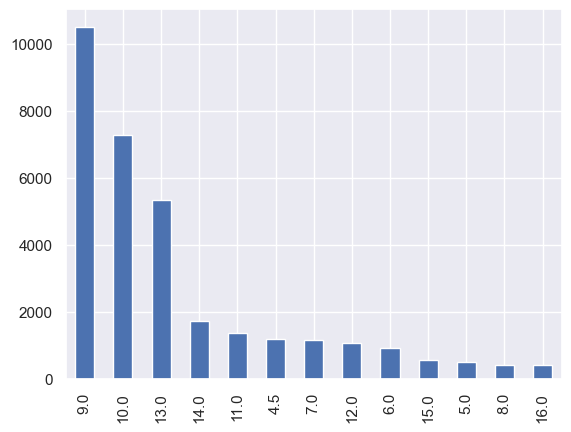

In [39]:
dm["Education-num"].value_counts().plot(kind="bar")

# Observation
Education and Education_num both are same and represent exactly same things

# Marital Status

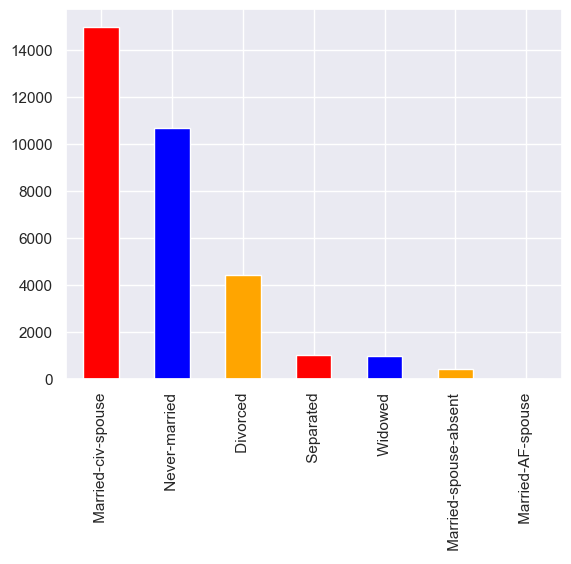

In [40]:
colour = ["red", "blue", "orange"]

dm["marital-status"].value_counts().plot(kind="bar", color=colour)
plt.show()

Married civ spouse has highest representation in data and Married Af spouse has lowest representation in Data

# "marital-status" and "Gender"

In [41]:
dm.groupby(["marital-status", "Gender"]).size().reset_index(name="count")

,marital-status,Gender,count
0,Divorced,Female,2670
1,Divorced,Male,1771
2,Married-AF-spouse,Female,14
3,Married-AF-spouse,Male,9
4,Married-civ-spouse,Female,1657
5,Married-civ-spouse,Male,13313
6,Married-spouse-absent,Female,205
7,Married-spouse-absent,Male,213
8,Never-married,Female,4760
9,Never-married,Male,5907


In [42]:
dm["marital-status"].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

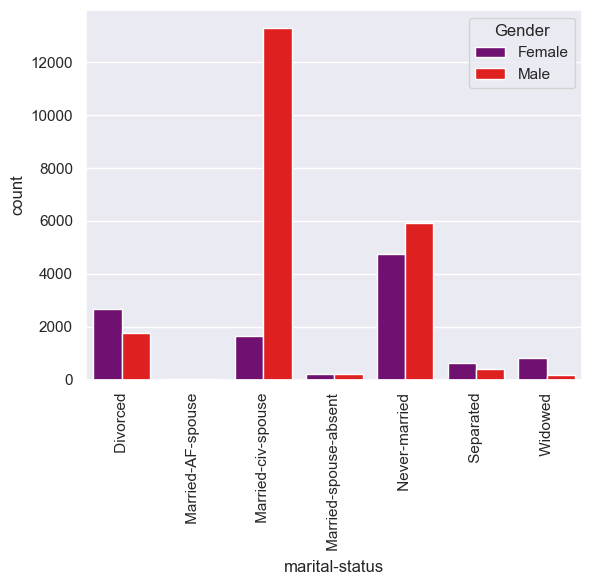

In [43]:
dm["Gender"] = dm["Gender"].str.strip()

# Custom colors for each category in the "marital-status" column
palette_colors = {"Female": "purple", "Male": "Red"}

sns.barplot(x="marital-status", y="count", hue="Gender",
            data=dm.groupby(["marital-status", "Gender"]).size().reset_index(name="count"),
            palette=palette_colors)

plt.xticks(rotation=90)
plt.show()

# Observation
Male have very high in no. who have married and live with his spouse and in the female representation its count is half of male in the Never married category

# Marital status and Income

In [44]:
dm.groupby(["marital-status", "income"]).size().reset_index(name="count")

,marital-status,income,count
0,Divorced,<=50K,3978
1,Divorced,>50K,463
2,Married-AF-spouse,<=50K,13
3,Married-AF-spouse,>50K,10
4,Married-civ-spouse,<=50K,8280
5,Married-civ-spouse,>50K,6690
6,Married-spouse-absent,<=50K,384
7,Married-spouse-absent,>50K,34
8,Never-married,<=50K,10176
9,Never-married,>50K,491


In [45]:
dm["marital-status"].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

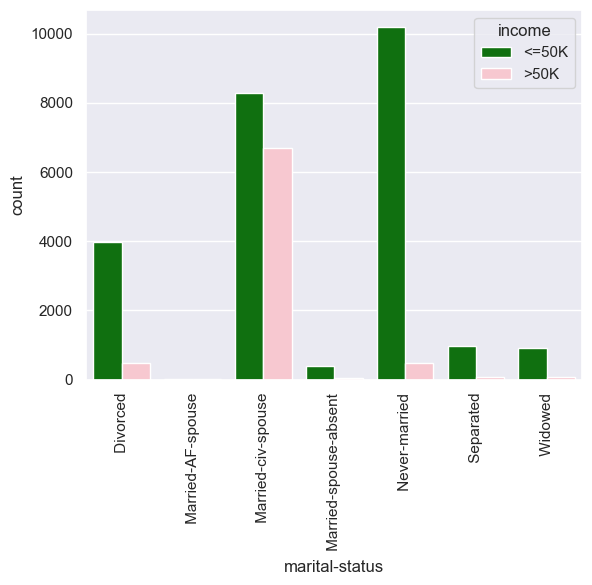

In [46]:
dm["income"] = dm["income"].str.strip()

# Custom colors for each category in the "marital-status" column
palette_colors = {"<=50K": "Green", ">50K": "pink"}

sns.barplot(x="marital-status", y="count", hue="income",
            data=dm.groupby(["marital-status", "income"]).size().reset_index(name="count"),
            palette=palette_colors)

plt.xticks(rotation=90)
plt.show()

# Observation:
- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.
- Married-civ-spouse is higher value count in marital status is (14970) in which more than 50k (8280) is in high counts in whole data , in never-married total value counts is (10667) in which higher quantity of <=50k is (10176) in while data

# Country

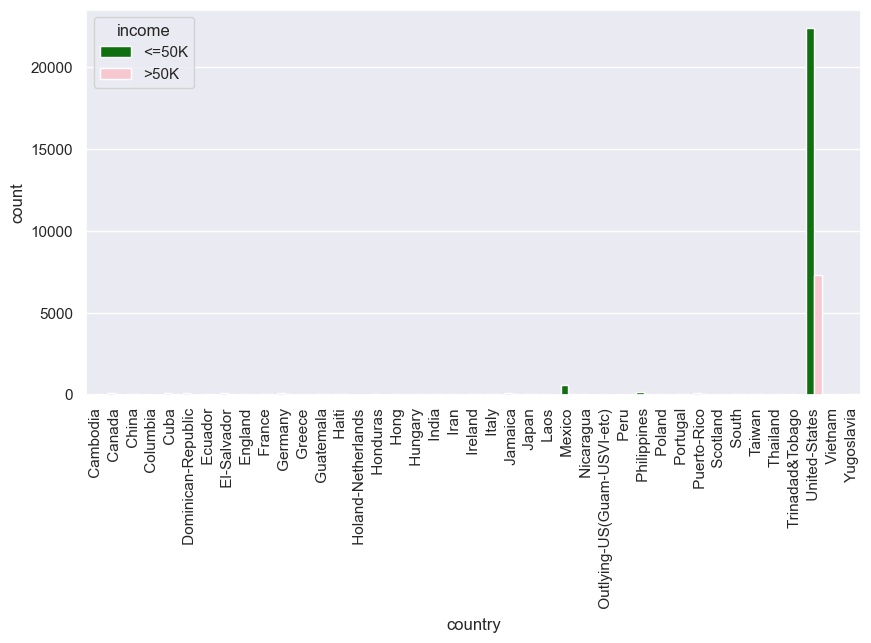

In [47]:
# Custom colors for each category in the "marital-status" column
plt.figure(figsize= (10,5))
palette_colors = {"<=50K": "Green", ">50K": "pink"}

sns.barplot(x="country", y="count", hue="income",
            data=dm.groupby(["country", "income"]).size().reset_index(name="count"),
            palette=palette_colors)

plt.xticks(rotation=90)
plt.show()

In [48]:
dm["country"].value_counts()

 United-States                 29735
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

 # Observation
 Mainly data dealing with USA

# "Profession Class" and "income"

In [49]:
dm.groupby(["Profession Class", "income"]).size().reset_index(name="count")

,Profession Class,income,count
0,Federal-gov,<=50K,589
1,Federal-gov,>50K,371
2,Local-gov,<=50K,1476
3,Local-gov,>50K,617
4,Never-worked,<=50K,7
5,Private,<=50K,19357
6,Private,>50K,5152
7,Self-emp-inc,<=50K,494
8,Self-emp-inc,>50K,622
9,Self-emp-not-inc,<=50K,1816


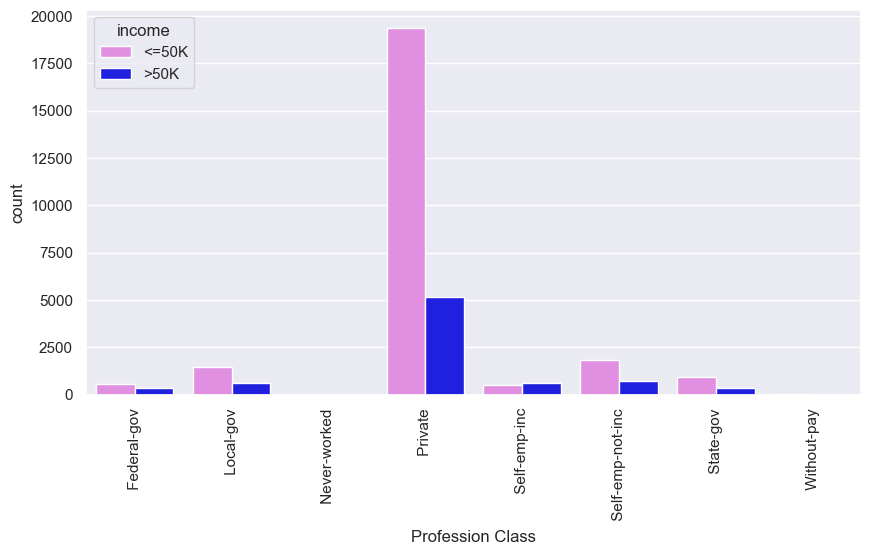

In [50]:
# Custom colors for each category in the "marital-status" column
plt.figure(figsize= (10,5))
palette_colors = {"<=50K": "violet", ">50K": "blue"}

sns.barplot(x="Profession Class", y="count", hue="income",
            data=dm.groupby(["Profession Class", "income"]).size().reset_index(name="count"),
            palette=palette_colors)

plt.xticks(rotation=90)
plt.show()

# Observation:
- In the above graph, we have segregated the incomes of adults on the basis of their different working classes.

- It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
- People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!
- There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.
- People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.mostly employee work in private jobs(24509)  from this,  mostly empoyee earn less than 50k income(19357), only in the Self-emp-not-inc higer people earn more than 50k other than every profession earnig count is more than of less than 50k 

### Term in Data
Self-emp-not-inc:

This category refers to individuals who are self-employed but not incorporated. They operate their own businesses or work as freelancers, consultants, or independent contractors without forming a separate legal entity for their business.

In [51]:
# in "Profession Class" col in this "never worked" value, with the help of this column filling "occupation"  column blank values
abc = dm[dm["Profession Class"] == " Never-worked"]
abc

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,age_group
5361,18.0,Never-worked,206359,10th,6.0,Never-married,Prof-specialty,Own-child,White,Male,0,0,40.0,United-States,<=50K,Greater than 70
10845,23.0,Never-worked,188535,7th-8th,4.5,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,35.0,United-States,<=50K,19-30
14772,17.0,Never-worked,237272,10th,6.0,Never-married,Prof-specialty,Own-child,White,Male,0,0,32.5,United-States,<=50K,Greater than 70
20337,18.0,Never-worked,157131,11th,7.0,Never-married,Prof-specialty,Own-child,White,Female,0,0,32.5,United-States,<=50K,Greater than 70
23232,20.0,Never-worked,462294,Some-college,10.0,Never-married,Prof-specialty,Own-child,Black,Male,0,0,40.0,United-States,<=50K,19-30
32304,30.0,Never-worked,176673,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,United-States,<=50K,19-30
32314,18.0,Never-worked,153663,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Male,0,0,32.5,United-States,<=50K,Greater than 70


In [52]:
# changing occupation to "Unemployed" for the above specified condition
dm.loc[dm["Profession Class"] == " Never-worked", "occupation"] = "Unemployed"

In [53]:
ab = dm[dm["Profession Class"] == " Never-worked"]
ab

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,age_group
5361,18.0,Never-worked,206359,10th,6.0,Never-married,Unemployed,Own-child,White,Male,0,0,40.0,United-States,<=50K,Greater than 70
10845,23.0,Never-worked,188535,7th-8th,4.5,Divorced,Unemployed,Not-in-family,White,Male,0,0,35.0,United-States,<=50K,19-30
14772,17.0,Never-worked,237272,10th,6.0,Never-married,Unemployed,Own-child,White,Male,0,0,32.5,United-States,<=50K,Greater than 70
20337,18.0,Never-worked,157131,11th,7.0,Never-married,Unemployed,Own-child,White,Female,0,0,32.5,United-States,<=50K,Greater than 70
23232,20.0,Never-worked,462294,Some-college,10.0,Never-married,Unemployed,Own-child,Black,Male,0,0,40.0,United-States,<=50K,19-30
32304,30.0,Never-worked,176673,HS-grad,9.0,Married-civ-spouse,Unemployed,Wife,Black,Female,0,0,40.0,United-States,<=50K,19-30
32314,18.0,Never-worked,153663,Some-college,10.0,Never-married,Unemployed,Own-child,White,Male,0,0,32.5,United-States,<=50K,Greater than 70


# 'Profession Class' and 'Education-num'

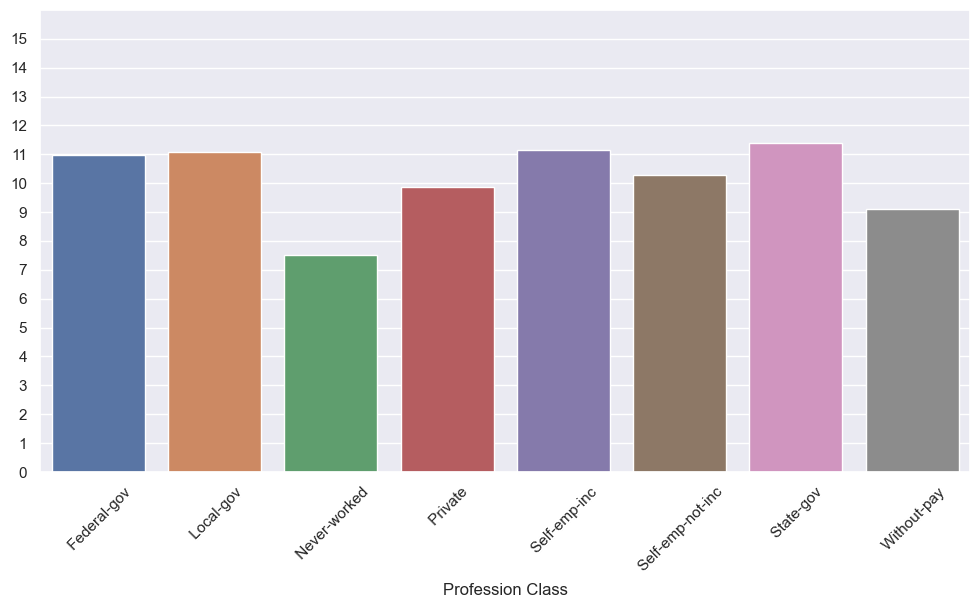

In [54]:
education_stats = dm.groupby('Profession Class')['Education-num'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=education_stats.index, y=education_stats.values)

# Set y-axis limits
plt.ylim(0, 16)
plt.yticks(range(0, 16, 1))
plt.xticks(rotation=45)
plt.show()

# Observation
- all Goverment Department Employee have almost equall Education

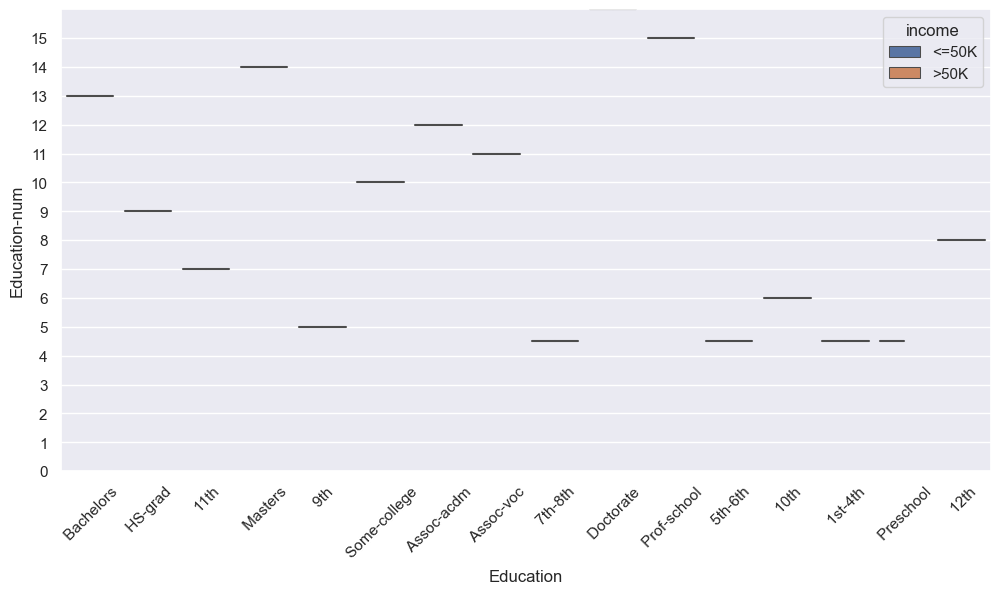

In [55]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Education', y='Education-num', hue='income', data=dm, split=True)
plt.xticks(rotation=45)
plt.ylim(0, 16)
plt.yticks(range(0, 16, 1))
plt.show()

# 'Education' and 'income'

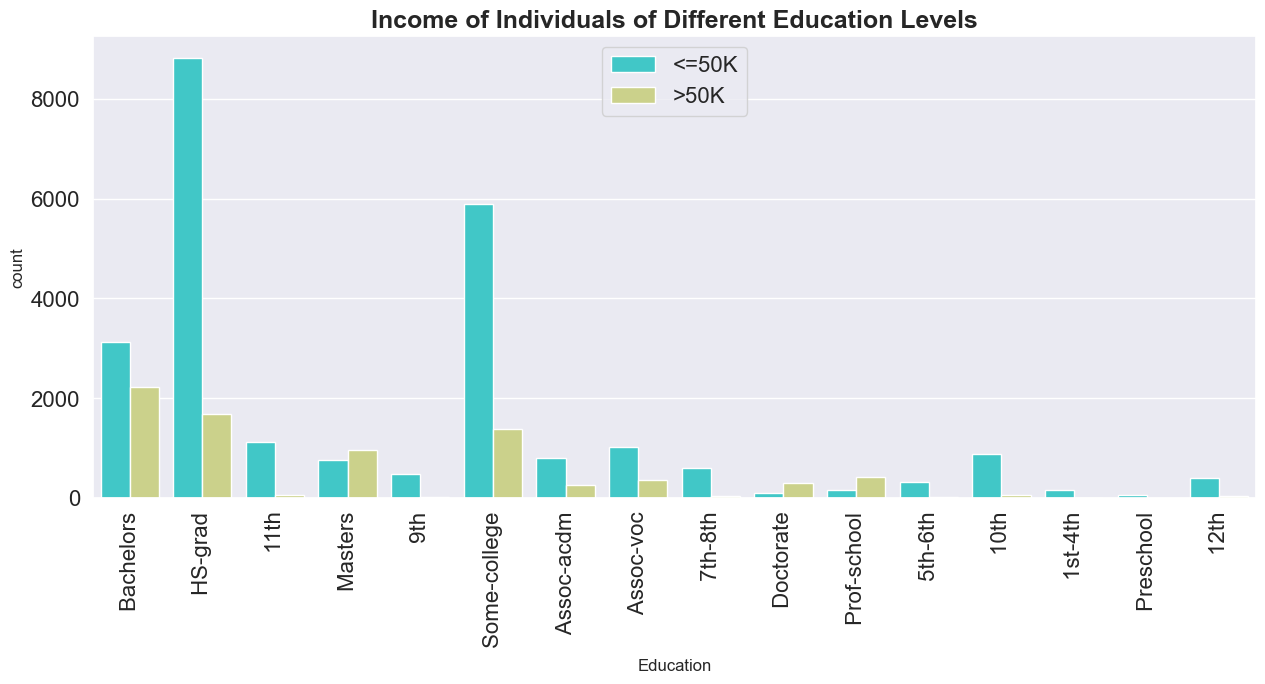

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(dm['Education'], hue = dm['income'],palette= "rainbow")
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation:

- For the people who have completed their education up till 12th Standard, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
- For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

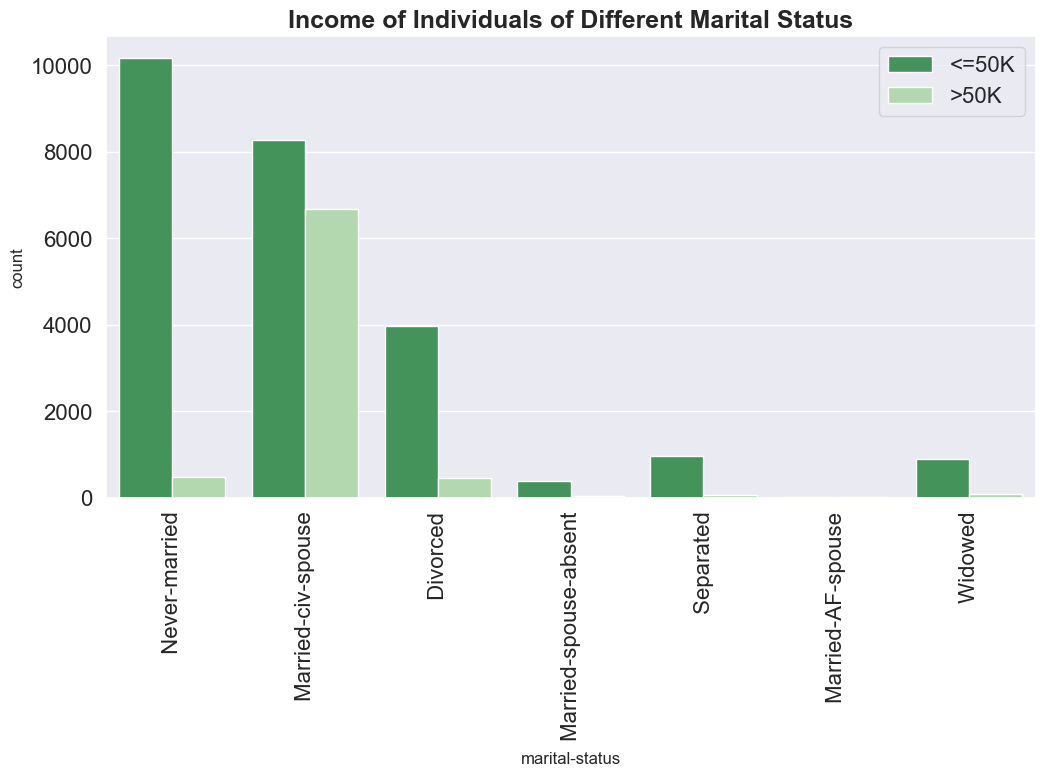

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(dm['marital-status'], hue = dm['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation:
- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

# 'Education' and 'income'

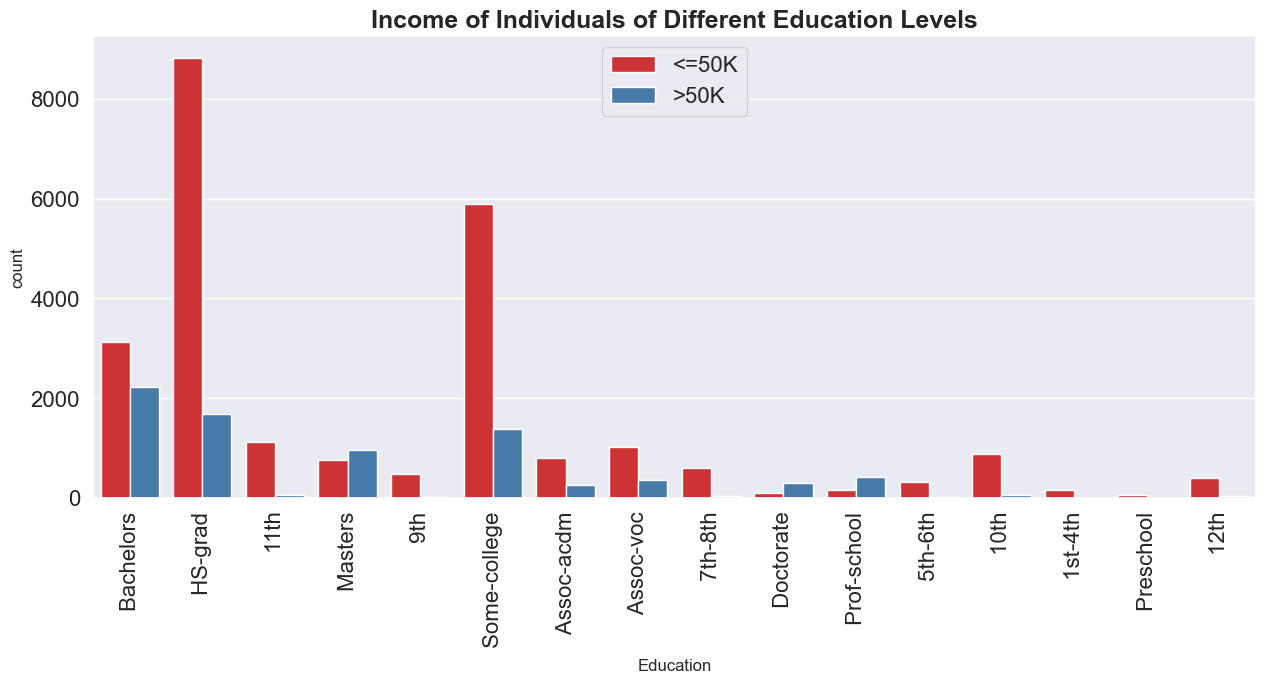

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(dm['Education'], hue = dm['income'], palette="Set1")
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation:
- For the people who have completed their education up till 12th Standard, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
- For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

# 'occupation' and 'income'

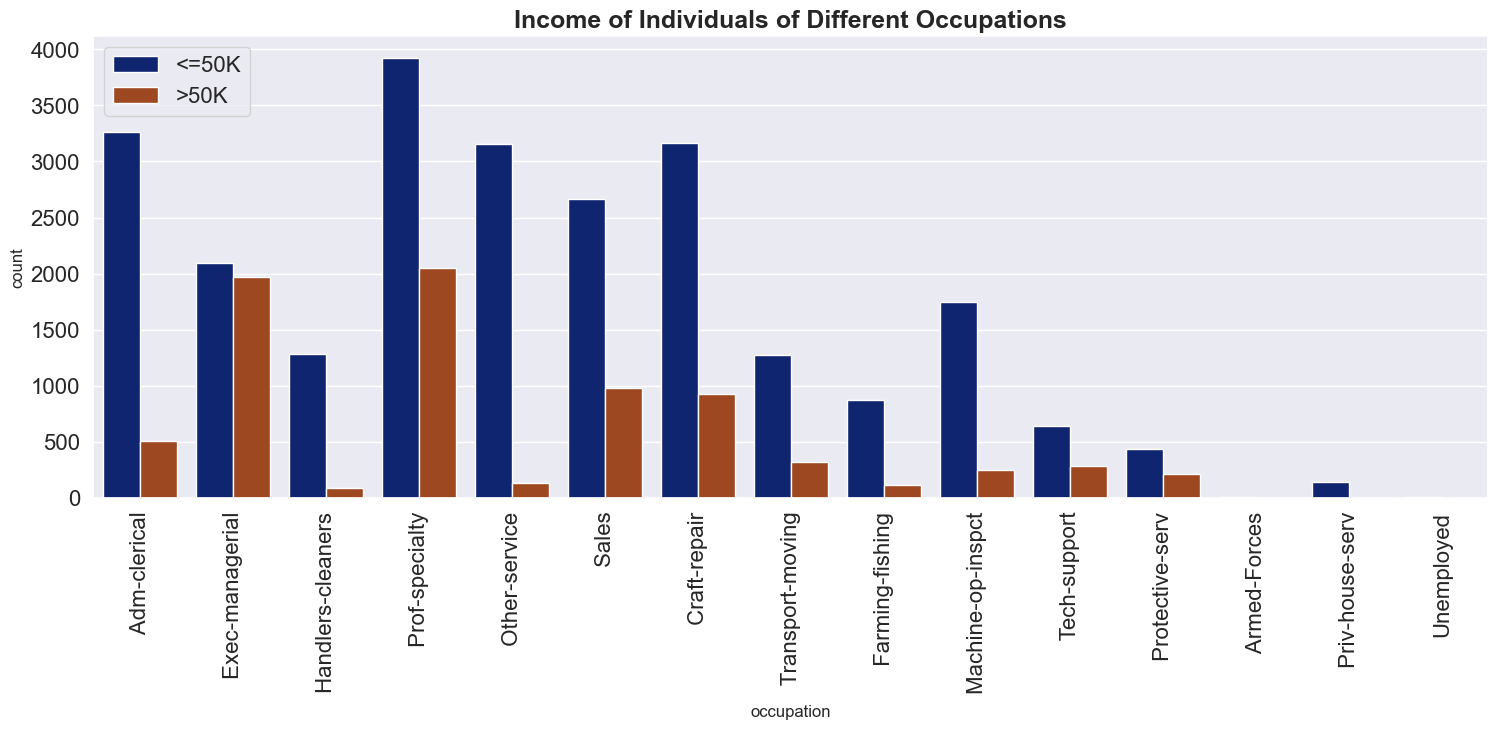

In [59]:
plt.figure(figsize=(18,6))
sns.countplot(dm['occupation'], hue = dm['income'], palette=("dark"))
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

#  Observation:
- A few points to note over here:-

- Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year.
- There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
- Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.

# 'relationship' and 'income'

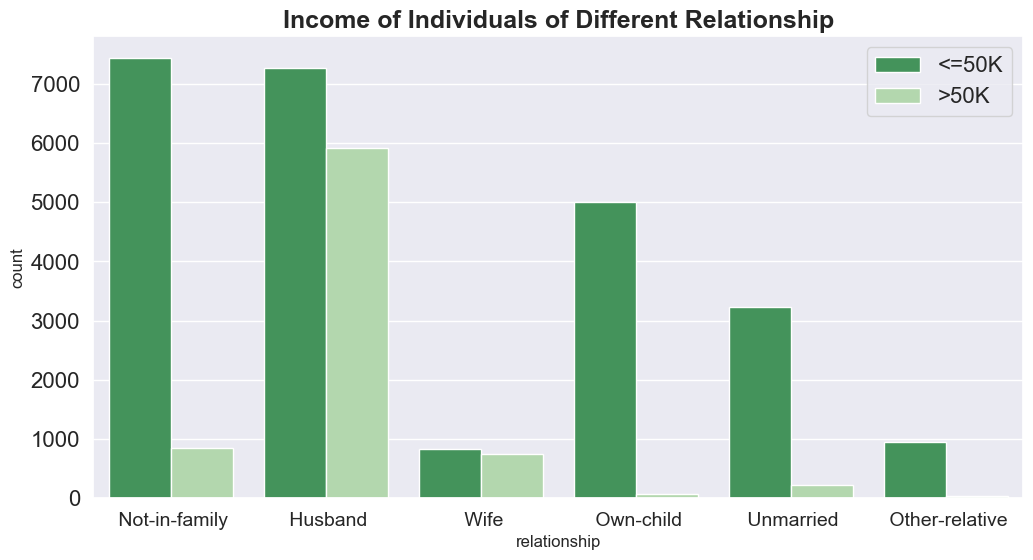

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(dm['relationship'], hue = dm['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation:
- Wives are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Unmarried people earning more than 50K dollars an year.

# 'race' and 'income'

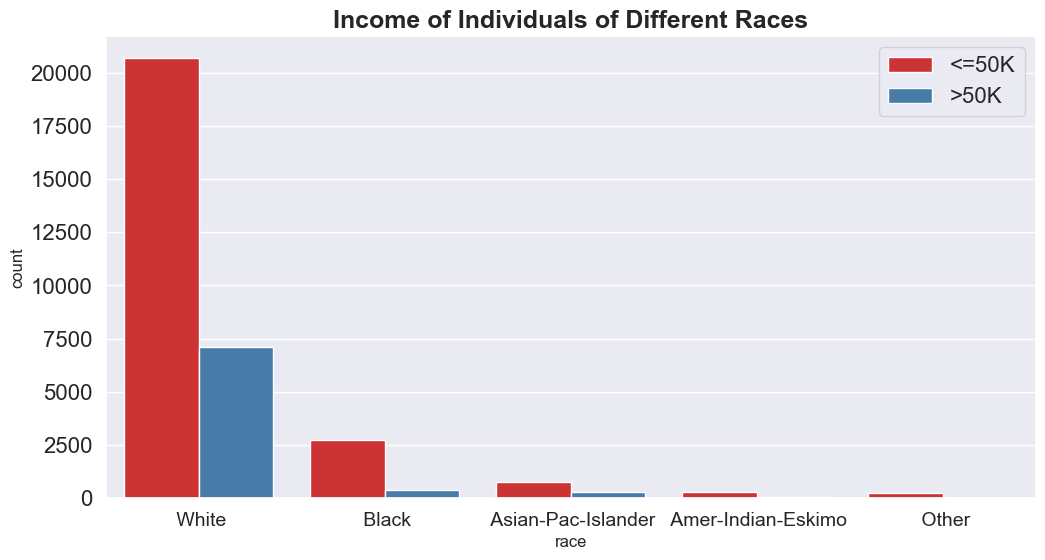

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(dm['race'], hue = dm['income'], palette='Set1')

plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Observation:
- An important point to notice over here is that, except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

# marital-status and Age

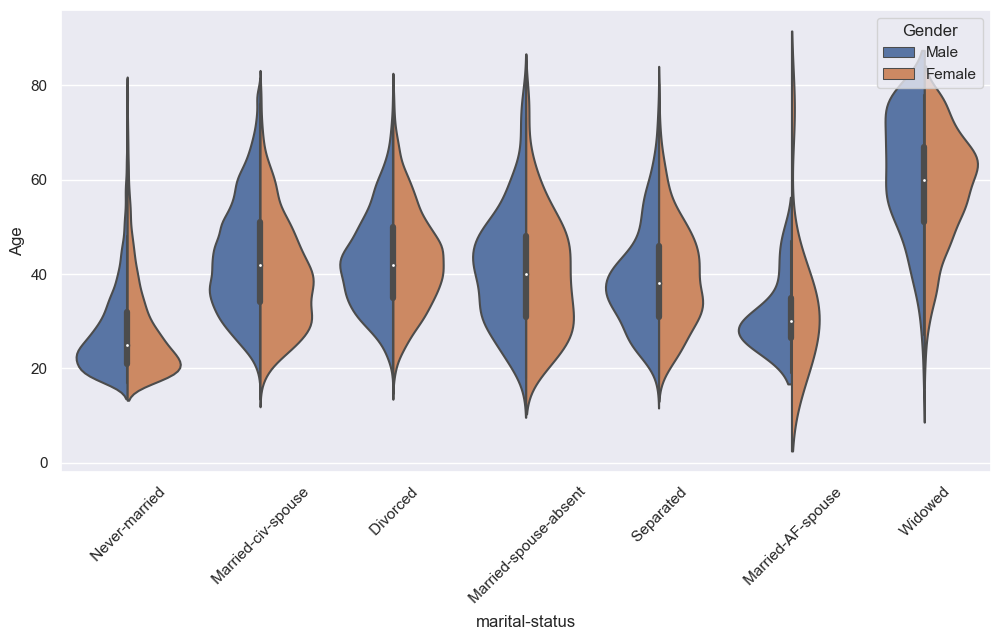

In [62]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='marital-status', y='Age', data=dm, hue='Gender', split=True)
plt.xticks(rotation=45)
plt.show()

# observation
 - in our dataset very less women who have married with Armed Force Spouse
 - all are category in marital status column have almost equally bulge data in both male and female around in between 30 to 50 apart for Widowed which is almost 35 to 80

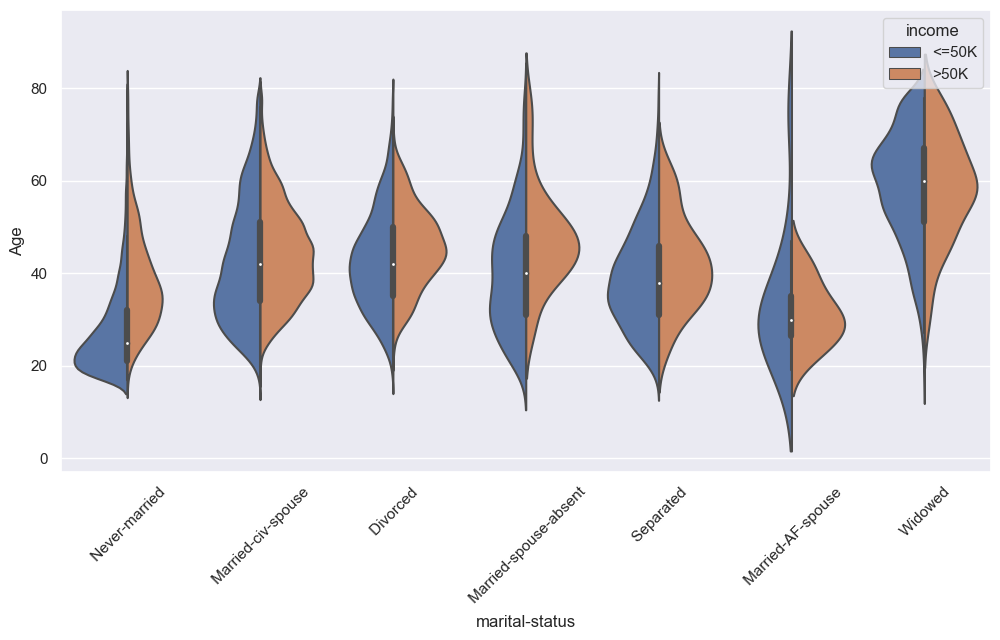

In [63]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='marital-status', y='Age', data=dm, hue='income', split=True)
plt.xticks(rotation=45)
plt.show()

# Observation
- in Never Married value who earned below 50k age mostly 20 and 30 to 40 age person earning more than 50k
- almost earning more than 50k people's age between 40 to 50
- Who are married with Armed Force have high range who earned more than 50k age following 25 to 35

# Final Census

In [82]:
dm["Final_census"].sum()

6174899468

In [107]:
result = dm.groupby("income")["Final_census"].sum().reset_index(name="count").rename(columns= {"income":"feature"})
result

,feature,count
0,<=50K,4701163700
1,>50K,1473735768


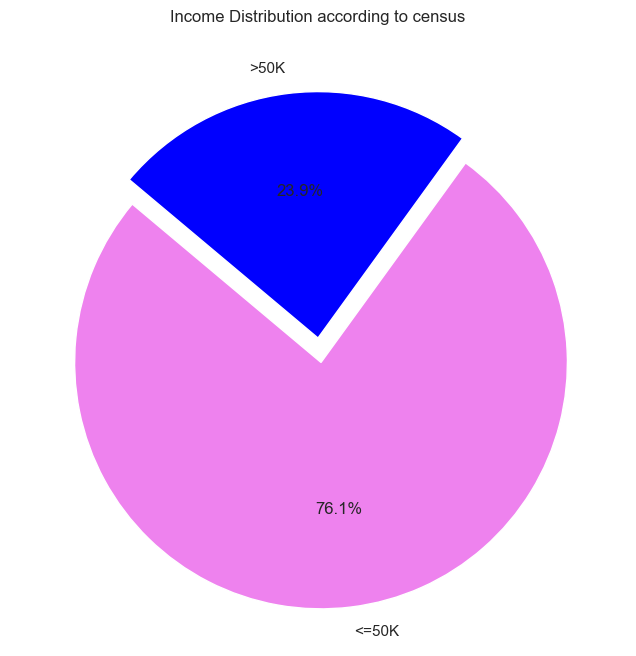

In [112]:
plt.figure(figsize=(8, 8))
colors = ["violet", "blue"]
explode = (0.1, 0)  # Explode the first slice (<=50K)

plt.pie(result["count"], labels=result["feature"], colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Income Distribution according to census')
plt.show()

In [94]:
# Basic Descriptive Statistics
final_census_stats = dm["Final_census"].describe().round(2)
print(final_census_stats)

count      32537.00
mean      189780.85
std       105556.47
min        12285.00
25%       117827.00
50%       178356.00
75%       236993.00
max      1484705.00
Name: Final_census, dtype: float64


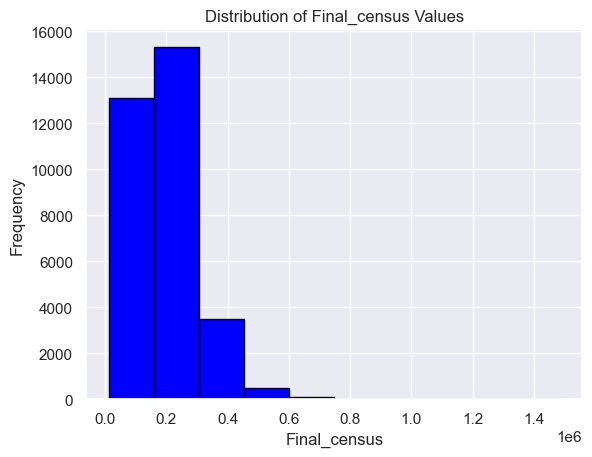

In [95]:
# Histogram
plt.hist(dm["Final_census"], bins=10, color='blue', edgecolor='black')
plt.xlabel('Final_census')
plt.ylabel('Frequency')
plt.title('Distribution of Final_census Values')
plt.show()

In [96]:
final_census_counts = dm["Final_census"].value_counts()
print(final_census_counts)

164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: Final_census, Length: 21648, dtype: int64


In [97]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32537 non-null  float64
 1   Profession Class  32537 non-null  object 
 2   Final_census      32537 non-null  int64  
 3   Education         32537 non-null  object 
 4   Education-num     32537 non-null  float64
 5   marital-status    32537 non-null  object 
 6   occupation        32537 non-null  object 
 7   relationship      32537 non-null  object 
 8   race              32537 non-null  object 
 9   Gender            32537 non-null  object 
 10  capital-gain      32537 non-null  int64  
 11  capital-loss      32537 non-null  int64  
 12  hours-per-week    32537 non-null  float64
 13  country           32537 non-null  object 
 14  income            32537 non-null  object 
 15  age_group         32537 non-null  object 
dtypes: float64(3), int64(3), object(10)
memo

In [98]:
print(dm['Final_census'].isnull().sum())

0


In [99]:
print("Data types after conversion:")
print("Final_census:", dm['Final_census'].dtype)
print("Income:", dm['income'].dtype)

Data types after conversion:
Final_census: int64
Income: object


In [100]:
dm.head(5)

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,age_group
0,39.0,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K,31-40
1,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K,41-50
2,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,31-40
3,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,51-60
4,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,19-30


In [101]:
dm.groupby(["marital-status", "relationship"]).size().reset_index(name="count")

,marital-status,relationship,count
0,Divorced,Not-in-family,2403
1,Divorced,Other-relative,110
2,Divorced,Own-child,328
3,Divorced,Unmarried,1600
4,Married-AF-spouse,Husband,9
5,Married-AF-spouse,Other-relative,1
6,Married-AF-spouse,Own-child,1
7,Married-AF-spouse,Wife,12
8,Married-civ-spouse,Husband,13178
9,Married-civ-spouse,Not-in-family,17


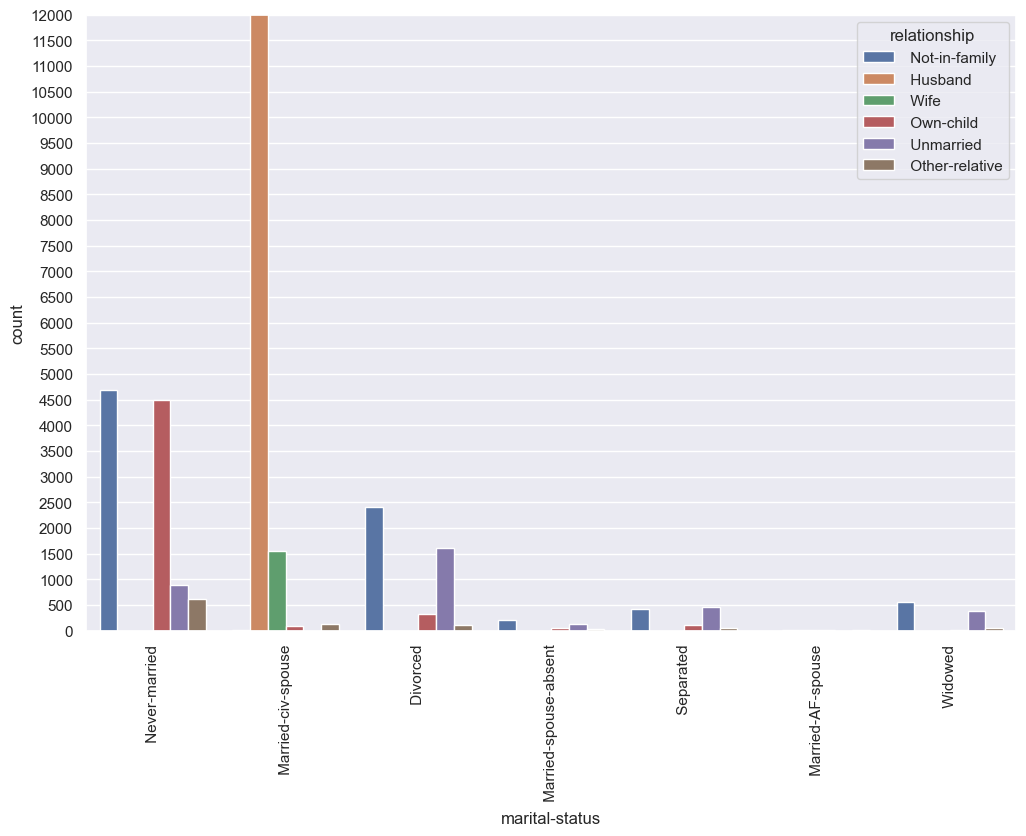

In [102]:
# Use Seaborn to create a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=dm, x='marital-status', hue='relationship')
plt.xticks(rotation = 90)
# Set y-axis limits
plt.ylim(0, 12000)
plt.yticks(range(0, 12001, 500))
plt.show()

In [103]:
dm.groupby("marital-status")["relationship"].count()

marital-status
 Divorced                  4441
 Married-AF-spouse           23
 Married-civ-spouse       14970
 Married-spouse-absent      418
 Never-married            10667
 Separated                 1025
 Widowed                    993
Name: relationship, dtype: int64

In [104]:
dm["relationship"].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [105]:
dm["marital-status"].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [106]:
dm.groupby(["country", "race"]).size().reset_index(name="count")

,country,race,count
0,Cambodia,Asian-Pac-Islander,18
1,Cambodia,Black,1
2,Canada,Asian-Pac-Islander,1
3,Canada,Other,1
4,Canada,White,119
...,...,...,...
103,United-States,Other,147
104,United-States,White,25992
105,Vietnam,Asian-Pac-Islander,65
106,Vietnam,White,2


In [107]:
dm["race"].value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [108]:
dm["country"].value_counts()

 United-States                 29735
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [109]:
coun = dm.sort_values(by = "country")
coun_10 = coun.head(10)

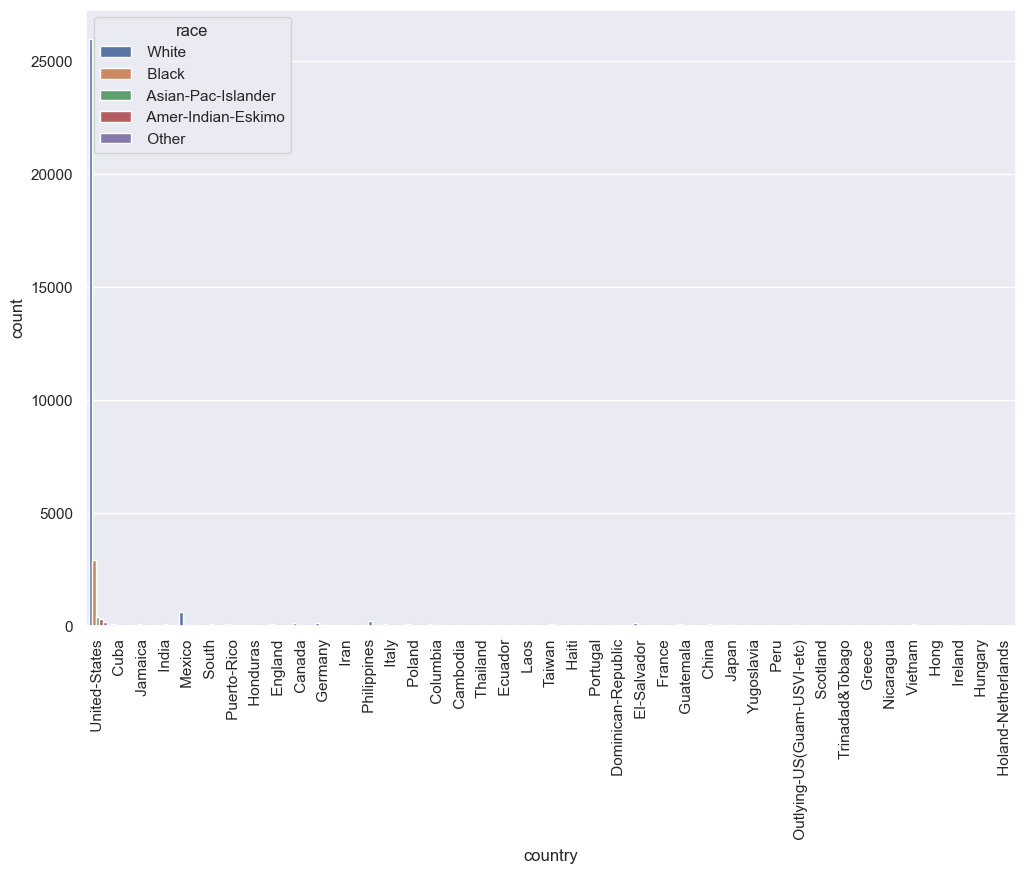

In [110]:
# Use Seaborn to create a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=dm, x='country', hue='race')
plt.xticks(rotation = 90)
# Set y-axis limits
plt.show()

In [111]:
# copy the data
df = dm.copy()

In [112]:
df["income"].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [113]:
# income values convert into 0 and 1
df["income"] = df["income"].str.replace("<=50K", "0")

In [81]:
df["income"] = df["income"].str.replace(">50K", "1")

In [82]:
df["income"] = df["income"].astype(int)

In [83]:
print(df["income"].dtype)

int32


In [84]:
correlation = df['Final_census'].corr(df['income'])
print("Correlation with income:", correlation)

Correlation with income: -0.009502349300418272


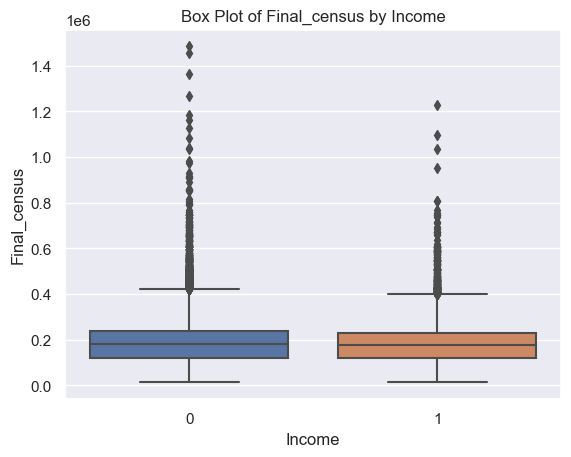

In [85]:
sns.boxplot(x='income', y='Final_census', data=df)
plt.xlabel('Income')
plt.ylabel('Final_census')
plt.title('Box Plot of Final_census by Income')
plt.show()

In [86]:
grouped_summary = df.groupby('income')['Final_census'].describe()
print("Grouped Summary Statistics for Final_census:")
print(grouped_summary)

Grouped Summary Statistics for Final_census:
          count           mean            std      min       25%       50%  \
income                                                                       
0       24698.0  190345.926796  106487.413197  12285.0  117606.0  179465.0   
1        7839.0  188000.480674  102554.464101  14878.0  119100.0  176063.0   

              75%        max  
income                        
0       238968.25  1484705.0  
1       230969.00  1226583.0  


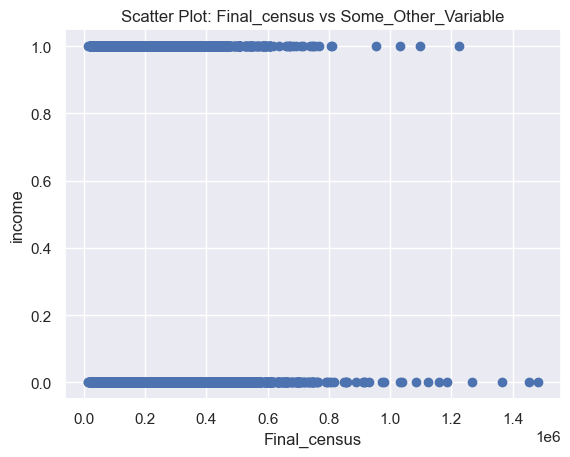

In [87]:
plt.scatter(df['Final_census'], df['income'])
plt.xlabel('Final_census')
plt.ylabel('income')
plt.title('Scatter Plot: Final_census vs Some_Other_Variable')
plt.show()

In [88]:
mean_final_census_by_income = df.groupby('income')['Final_census'].mean()
print("Mean Final_census by Income:")
print(mean_final_census_by_income)

Mean Final_census by Income:
income
0    190345.926796
1    188000.480674
Name: Final_census, dtype: float64


In [89]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,age_group
0,39.0,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,0,31-40
1,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,0,41-50
2,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,0,31-40
3,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0,51-60
4,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0,19-30


### Some alteration in values of some columns

In [90]:
df['Education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [91]:
df["Education"].values

array([' Bachelors', ' Bachelors', ' HS-grad', ..., ' HS-grad',
       ' HS-grad', ' HS-grad'], dtype=object)

In [105]:
# some similar colmns to the another column in the dataset just drop it.........
df = df.drop(["Education-num", "relationship","Age"], axis=1)

In [106]:
df.head()

,Profession Class,Final_census,Education,marital-status,occupation,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,age_group
0,State-gov,77516,Bachelors,Never-married,Adm-clerical,White,Male,2174,0,40.0,United-States,0,31-40
1,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,32.5,United-States,0,41-50
2,Private,215646,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40.0,United-States,0,31-40
3,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40.0,United-States,0,51-60
4,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40.0,Cuba,0,19-30


In [114]:
# finding object type col in the dataset
obj_co= df.select_dtypes(include="O")
obj_co

,Profession Class,Education,marital-status,occupation,race,Gender,country,age_group
0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,United-States,31-40
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,United-States,41-50
2,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,United-States,31-40
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States,51-60
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,Cuba,19-30
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,United-States,19-30
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,United-States,31-40
32558,Private,HS-grad,Widowed,Adm-clerical,White,Female,United-States,51-60
32559,Private,HS-grad,Never-married,Adm-clerical,White,Male,United-States,19-30


# Appling Label Encoding

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[obj_co.columns] = df[obj_co.columns].apply(le.fit_transform)

In [117]:
df.head()

,Profession Class,Final_census,Education,marital-status,occupation,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,age_group
0,6,77516,9,4,0,4,1,2174,0,40.0,38,0,1
1,5,83311,9,2,3,4,1,0,0,32.5,38,0,2
2,3,215646,11,0,5,4,1,0,0,40.0,38,0,1
3,3,234721,1,2,5,2,1,0,0,40.0,38,0,3
4,3,338409,9,2,9,2,0,0,0,40.0,4,0,0


# Checking Correlation

<AxesSubplot:>

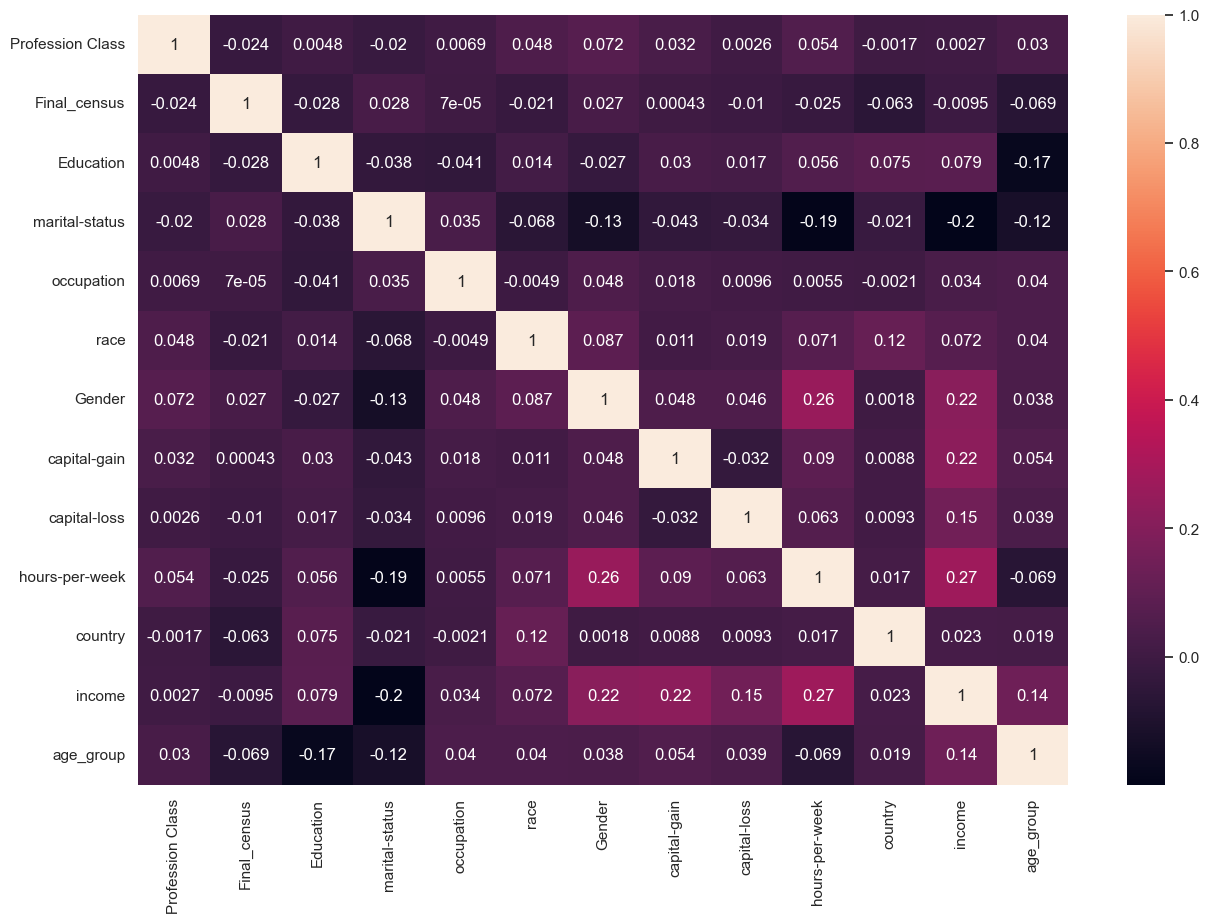

In [119]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True)

# Distribute into x and y 

In [121]:
x = df.drop("income", axis=1)
y= df[["income"]]

# Scale the data

In [122]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
stt = st.fit_transform(x)
stt = pd.DataFrame(stt, columns=x.columns)

# spliting into train and test data

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(stt, y, random_state= 102, test_size= 0.2, stratify= y)

# Approch no. 1
- Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

# predicting

In [173]:
tr_pr = log.predict(x_train)
te_pr = log.predict(x_test)

# validation

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_train", accuracy_score(y_train, tr_pr))
print("accuracy_train", accuracy_score(y_test, te_pr))
print( )
print("classification_report_train\n", classification_report(y_train, tr_pr))
print("classification_report_test\n", classification_report(y_test, te_pr))
print( )
print("confusion_matrix\n", confusion_matrix(y_train, tr_pr))
print("confusion_matrix\n", confusion_matrix(y_test, te_pr))

accuracy_train 0.8032963233316686
accuracy_train 0.7987092808850645

classification_report_train
               precision    recall  f1-score   support

           0       0.82      0.96      0.88     19758
           1       0.70      0.32      0.44      6271

    accuracy                           0.80     26029
   macro avg       0.76      0.64      0.66     26029
weighted avg       0.79      0.80      0.78     26029

classification_report_test
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4940
           1       0.67      0.32      0.43      1568

    accuracy                           0.80      6508
   macro avg       0.74      0.64      0.66      6508
weighted avg       0.78      0.80      0.77      6508


confusion_matrix
 [[18873   885]
 [ 4235  2036]]
confusion_matrix
 [[4695  245]
 [1065  503]]


# Approach no. 2 
- Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier()
rnd.fit(x_train, y_train)

RandomForestClassifier()

In [176]:
tr_pr_rn = rnd.predict(x_train)
te_pr_rn = rnd.predict(x_test)

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_train", accuracy_score(y_train, tr_pr_rn))
print("accuracy_train", accuracy_score(y_test, te_pr_rn))
print( )
print("classification_report_train\n", classification_report(y_train, tr_pr_rn))
print("classification_report_test\n", classification_report(y_test, te_pr_rn))
print( )
print("confusion_matrix\n", confusion_matrix(y_train, tr_pr_rn))
print("confusion_matrix\n", confusion_matrix(y_test, te_pr_rn))

accuracy_train 0.9998079065657536
accuracy_train 0.8531038721573448

classification_report_train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19758
           1       1.00      1.00      1.00      6271

    accuracy                           1.00     26029
   macro avg       1.00      1.00      1.00     26029
weighted avg       1.00      1.00      1.00     26029

classification_report_test
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4940
           1       0.74      0.61      0.67      1568

    accuracy                           0.85      6508
   macro avg       0.81      0.77      0.79      6508
weighted avg       0.85      0.85      0.85      6508


confusion_matrix
 [[19756     2]
 [    3  6268]]
confusion_matrix
 [[4601  339]
 [ 617  951]]


# Approach no. 3
- K Nearest Neighbour

In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [195]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.79210203, 0.80531653, 0.80838967, 0.81130916, 0.8154579 ,
       0.82052858, 0.81807007, 0.81837738, 0.81883835, 0.82022127,
       0.82237246, 0.82329441, 0.82098955, 0.82375538, 0.82775046,
       0.82252612, 0.82483098, 0.82437001, 0.82298709, 0.82191149])

# Choose the best K-Value (HyperParameter Tunning)

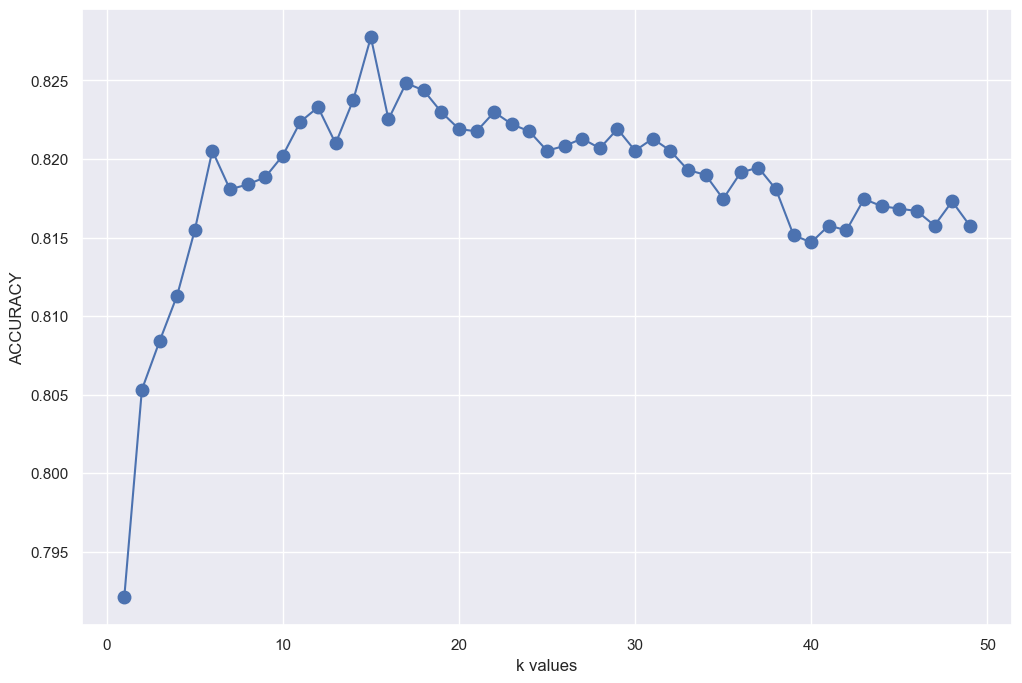

In [196]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_K = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy =accuracy_score(y_test, y_pred)
    accuracy_K.append(accuracy)

plt.figure(figsize=(12,8))
plt.xlabel("k values")
plt.ylabel("ACCURACY")
plt.plot(range(1,50),accuracy_K, marker='o', markersize=9)


In [197]:
# 5 is Good
accuracy_K

[0.7921020282728949,
 0.8053165334972342,
 0.8083896742470805,
 0.8113091579594346,
 0.8154578979717271,
 0.8205285802089736,
 0.8180700676090965,
 0.8183773816840811,
 0.818838352796558,
 0.8202212661339889,
 0.8223724646588814,
 0.8232944068838353,
 0.8209895513214506,
 0.8237553779963123,
 0.8277504609711125,
 0.8225261216963737,
 0.8248309772587584,
 0.8243700061462815,
 0.8229870928088506,
 0.8219114935464045,
 0.8217578365089121,
 0.8229870928088506,
 0.8222188076213891,
 0.8217578365089121,
 0.8205285802089736,
 0.8208358942839582,
 0.8212968653964352,
 0.8206822372464659,
 0.8219114935464045,
 0.8205285802089736,
 0.8212968653964352,
 0.8205285802089736,
 0.819299323909035,
 0.8189920098340504,
 0.8174554394591272,
 0.8191456668715427,
 0.8194529809465273,
 0.8180700676090965,
 0.8151505838967424,
 0.8146896127842655,
 0.8157652120467117,
 0.8154578979717271,
 0.8174554394591272,
 0.8169944683466502,
 0.816840811309158,
 0.8166871542716656,
 0.8157652120467117,
 0.8173017824216

# Model KNN

In [198]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Prediction

In [199]:
tr_knn = knn.predict(x_train)
test_knn = knn.predict(x_test)

In [200]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_train", accuracy_score(y_train, tr_knn))
print("accuracy_train", accuracy_score(y_test, test_knn))
print( )
print("classification_report_train\n", classification_report(y_train, tr_knn))
print("classification_report_test\n", classification_report(y_test, test_knn))
print( )
print("confusion_matrix\n", confusion_matrix(y_train, tr_knn))
print("confusion_matrix\n", confusion_matrix(y_test, test_knn))

accuracy_train 0.8748703369318837
accuracy_train 0.8154578979717271

classification_report_train
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     19758
           1       0.78      0.67      0.72      6271

    accuracy                           0.87     26029
   macro avg       0.84      0.81      0.82     26029
weighted avg       0.87      0.87      0.87     26029

classification_report_test
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      4940
           1       0.63      0.56      0.59      1568

    accuracy                           0.82      6508
   macro avg       0.75      0.73      0.74      6508
weighted avg       0.81      0.82      0.81      6508


confusion_matrix
 [[18553  1205]
 [ 2052  4219]]
confusion_matrix
 [[4432  508]
 [ 693  875]]


# Appling Cross Validation Technique

In [201]:
estimator = [("log", log), ("RAN_FO", rnd), ("KNN",knn)]

In [207]:
from sklearn.model_selection import cross_val_score
for i in estimator:
    train = cross_val_score(i[1], x_train, y_train, scoring="accuracy", cv=10)
    test = cross_val_score(i[1], x_test, y_test, scoring="accuracy", cv=10)
    print(i)
    print(np.mean(train))
    print(np.mean(test))

('log', LogisticRegression())
0.8031814234329631
0.7988668320926384
('RAN_FO', RandomForestClassifier())
0.849590802075179
0.8452721257237386
('KNN', KNeighborsClassifier())
0.8200469924284727
0.8002476663121826


# Final Conclusion
In conclusion, after evaluating three different models – Random Forest, Logistic Regression, and K-Nearest Neighbors (KNN) – for a given task, it has been observed that Random Forest classifier performs the best. The assessment involved measuring accuracy, checking for overfitting or underfitting, and examining errors through cross-metrics.

Among the three models, Random Forest exhibited consistently high accuracy, indicating robust performance. Unlike Logistic Regression and KNN, which showed higher errors during cross-metric analysis, Random Forest demonstrated superior predictive capabilities with lower errors.

Therefore, based on the observed performance metrics, Random Forest emerges as the preferred choice for making predictions on unseen data. This conclusion is drawn considering the model's overall accuracy, generalization capabilities, and robustness in handling different aspects of the dataset.

Thank you for your attention and consideration.